#### Importing the Data

In [ ]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
import mysklearn.plot_utils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier
import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Initialize the all the Classifiers
knn_classifier = MyKNeighborsClassifier()
dummy_classifier = MyDummyClassifier()
naive_class = MyNaiveBayesClassifier()
tree_classifier = MyDecisionTreeClassifier()
forest_classifier = MyRandomForestClassifier(n_trees=10)

#### Cleaning the Data

In [2]:
table = MyPyTable().csv_to_mypytable("input_file/fifa_players.csv")

rating_column = table.get_column("overall_rating")
indexes_to_drop = [index for index, row in enumerate(rating_column) if int(row) < 70]
print(indexes_to_drop)
print("size before: " , len(table.data))
table.drop_rows(indexes_to_drop)
print("size after: " , len(table.data))


table.remove_column("name")
table.remove_column("full_name")
table.remove_column("birth_date")
table.remove_column("age")
table.remove_column("weight_kgs")
table.remove_column("nationality")
table.remove_column("overall_rating")
table.remove_column("potential")
table.remove_column("value_euro")
table.remove_column("wage_euro")
table.remove_column("preferred_foot")
table.remove_column("international_reputation(1-5)")
table.remove_column("weak_foot(1-5)")
table.remove_column("body_type")
table.remove_column("release_clause_euro")
table.remove_column("national_team")
table.remove_column("national_rating")
table.remove_column("national_team_position")
table.remove_column("national_jersey_number")
table.remove_column("heading_accuracy")
table.remove_column("volleys")
table.remove_column("curve")
table.remove_column("sprint_speed")
table.remove_column("reactions")
table.remove_column("balance")
table.remove_column("jumping")
table.remove_column("strength")
table.remove_column("aggression")
table.remove_column("penalties")
table.remove_column("composure")
table.remove_column("sliding_tackle")

positions = table.get_column("positions")
discretized_positions = []
for position in positions:
    discretized_positions.append(myutils.classify_position(position))

print(discretized_positions)
table.pretty_print()
print("size after: " , len(table.data))

[1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 172

#### Perform Analysis (using kNN, Naive Bayes, Dummy, and Single Decision Tree Classifiers)

In [3]:
naive_class.header = [
    "height_cm",
    "positions",
    "skill_moves(1-5)",
    "crossing",
    "finishing",
    "short_passing",
    "dribbling",
    "freekick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "agility",
    "shot_power",
    "stamina",
    "long_shots",
    "interceptions",
    "positioning",
    "vision",
    "marking",
    "standing_tackle"
]
# List of columns to include in the combined list
columns_to_include = [
    "height_cm",
    "positions",
    "skill_moves(1-5)",
    "crossing",
    "finishing",
    "short_passing",
    "dribbling",
    "freekick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "agility",
    "shot_power",
    "stamina",
    "long_shots",
    "interceptions",
    "positioning",
    "vision",
    "marking",
    "standing_tackle"
]

# Extract the indices of the specified columns
column_indices = [table.column_names.index(col) for col in columns_to_include]
# Construct the combined list directly from the table data
combined_list = [[row[id] for id in column_indices] for row in table.data]
# Extract the target
target = discretized_positions

#knn_accuracy, knn_error_rate = myutils.cross_val_predict( classifier=naive_class, X =combined_list, y=target, k=10, stratify=False )
#print(knn_accuracy, knn_error_rate)
myutils.perform_analysis(features = combined_list, targets = target, knn_classifier= knn_classifier, dummy_classifier= dummy_classifier, naive_class= naive_class, tree_classifier=tree_classifier)

# evaluate using multiple different trees, F max number of features 5, and Number of Features being total dataset
# forest_classifier = MyRandomForestClassifier(n_trees=10, max_features=5)
# forest_classifier.fit(X=combined_list, y = target)
# print(forest_classifier.tree_accuracies)

KNN Classifier: accuracy = 0.35, error rate = 0.65
Dummy Classifier: accuracy = 0.35, error rate = 0.65
Naive Bayes Classifier: accuracy = 0.91, error rate = 0.09
Decision Tree Classifier: accuracy = 0.95, error rate = 0.05


In [4]:
from random import sample, seed
import copy

# Set a random seed for reproducibility
seed(42)

# List to store results for different combinations of N, M, and F
results = []

# Original combined list and target
original_combined_list = copy.deepcopy(combined_list)
original_target = copy.deepcopy(target)

# Define different settings for N, M, and F
N_values = [
    len(original_combined_list) // 4,
    len(original_combined_list) // 2,
    len(original_combined_list),
]  # Different dataset sizes (rows)
M_values = [
    len(columns_to_include) // 2,
    len(columns_to_include),
]  # Different number of features (columns)
F_values = [3, 5, len(columns_to_include)]  # Different max features for Random Forest

# Run experiments for each combination of N, M, and F
for N in N_values:
    for M in M_values:
        for F in F_values:
            accuracies = []
            confusion_matrices = []

            # Repeat each setting 5 times for better evaluation
            for _ in range(5):
                # Reduce rows (N): Sample N rows randomly from the original dataset
                sampled_indices = sample(range(len(original_combined_list)), N)
                sampled_data = [original_combined_list[idx] for idx in sampled_indices]
                sampled_target = [original_target[idx] for idx in sampled_indices]

                # Reduce features (M): Select the first M columns from the sampled data
                reduced_data = [row[:M] for row in sampled_data]

                # Initialize and fit the Random Forest Classifier
                forest_classifier = MyRandomForestClassifier(n_trees=10, max_features=F)
                forest_classifier.fit(X=reduced_data, y=sampled_target)

                # Predict using the Random Forest and calculate accuracy
                predictions = forest_classifier.predict(reduced_data)
                accuracy = myevaluation.accuracy_score(sampled_target, predictions)
                accuracies.append(accuracy)

                # Compute confusion matrix
                labels = list(set(sampled_target))  # Unique target classes
                confusion_matrices.append(myevaluation.confusion_matrix(sampled_target, predictions, labels))

            # Store the average accuracy and confusion matrices for the current combination
            avg_accuracy = sum(accuracies) / len(accuracies)
            results.append({
                "N": N,
                "M": M,
                "F": F,
                "Accuracy": avg_accuracy,
                "Confusion Matrices": confusion_matrices,
            })

# Print the results for each setting of N, M, and F
print("\nTuning Results:")
for result in results:
    print(f"N: {result['N']}, M: {result['M']}, F: {result['F']}, Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrices:")
    for matrix in result["Confusion Matrices"]:
        print(matrix)
    print()

best_result = max(results, key=lambda r: r["Accuracy"])
print("Best Configuration:")
print(f"N: {best_result['N']}, M: {best_result['M']}, F: {best_result['F']}, Accuracy: {best_result['Accuracy']:.4f}")


Tuning Results:
N: 1416, M: 10, F: 3, Accuracy: 0.9422
Confusion Matrices:
[[468, 0, 0, 22], [0, 120, 0, 0], [0, 0, 470, 36], [0, 0, 0, 300]]
[[466, 0, 0, 24], [0, 118, 0, 0], [0, 0, 455, 46], [0, 0, 0, 307]]
[[480, 0, 0, 15], [0, 137, 0, 0], [0, 0, 436, 38], [0, 0, 0, 310]]
[[454, 0, 0, 22], [0, 127, 0, 0], [0, 0, 474, 45], [0, 0, 0, 294]]
[[428, 0, 0, 10], [0, 142, 0, 0], [0, 0, 489, 39], [0, 0, 0, 308]]

N: 1416, M: 10, F: 5, Accuracy: 0.9408
Confusion Matrices:
[[449, 0, 0, 17], [0, 128, 0, 0], [0, 0, 468, 35], [0, 0, 0, 319]]
[[435, 0, 0, 27], [0, 124, 0, 0], [0, 0, 464, 41], [0, 0, 0, 325]]
[[434, 0, 0, 15], [0, 123, 0, 0], [0, 0, 499, 38], [0, 0, 0, 307]]
[[460, 0, 0, 22], [0, 127, 0, 0], [0, 0, 460, 41], [0, 0, 0, 306]]
[[433, 0, 0, 25], [0, 135, 0, 0], [0, 0, 470, 40], [0, 0, 0, 313]]

N: 1416, M: 10, F: 20, Accuracy: 0.9384
Confusion Matrices:
[[439, 0, 0, 20], [0, 135, 0, 0], [0, 0, 485, 39], [0, 0, 0, 298]]
[[447, 0, 0, 19], [0, 118, 0, 0], [0, 0, 452, 54], [0, 0, 0, 326]]

#### Data Visualization: 

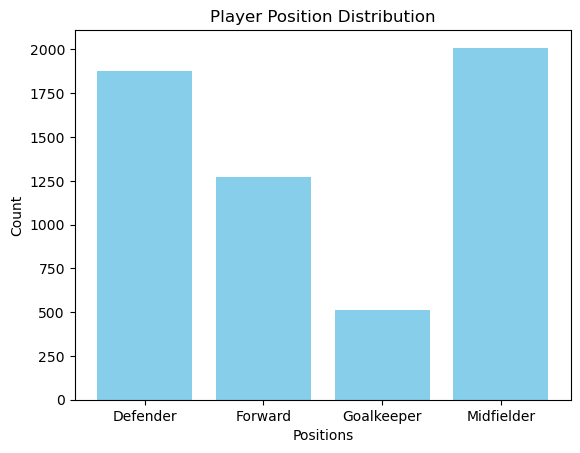

In [ ]:
import importlib
import mysklearn.plot_utils

# Reload the plot_utils module
importlib.reload(mysklearn.plot_utils)

# Assuming `discretized_positions` is already computed
# Compute the frequencies of the discretized positions
unique_positions, counts = mysklearn.plot_utils.get_frequencies(discretized_positions)

# Plot the histogram
mysklearn.plot_utils.plot_histogram(
    unique_positions,
    counts,
    title="Player Position Distribution",
    xlabel="Positions",
    ylabel="Count"
)

Figure 1: Bar chart showing class distribution

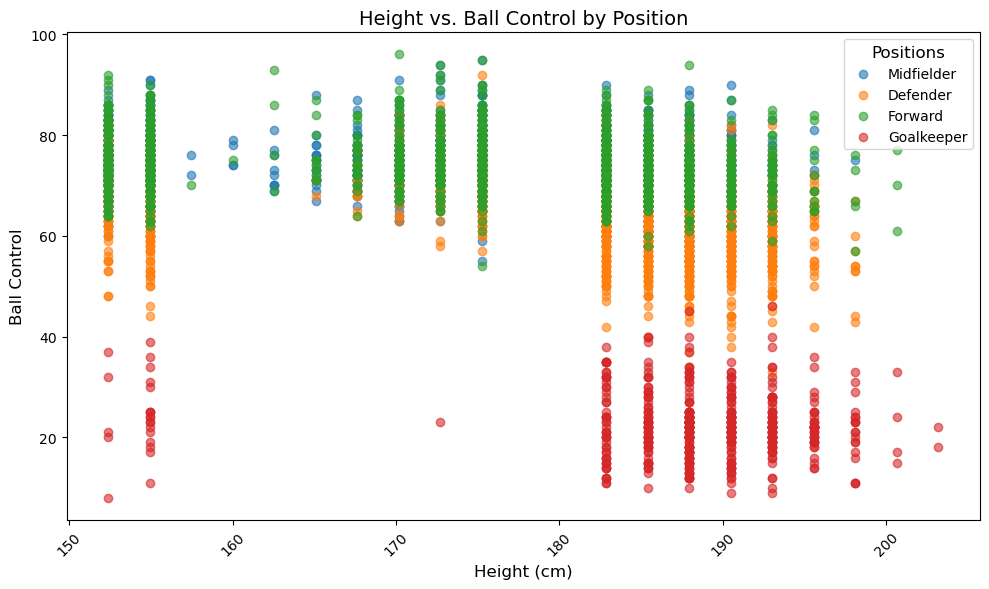

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure height and ball control are numeric
height = table.get_column("height_cm")
ball_control = table.get_column("ball_control")

# Convert to numeric, handling non-numeric values
def to_numeric(column, name):
    try:
        return [float(value) for value in column]
    except ValueError:
        print(f"Non-numeric values found in '{name}' column. Replacing with NaN.")
        return [float(value) if value.isnumeric() else np.nan for value in column]

height = to_numeric(height, "height_cm")
ball_control = to_numeric(ball_control, "ball_control")

# Drop rows with NaN
valid_indices = [i for i in range(len(height)) if not np.isnan(height[i]) and not np.isnan(ball_control[i])]
height = [height[i] for i in valid_indices]
ball_control = [ball_control[i] for i in valid_indices]
positions = [discretized_positions[i] for i in valid_indices]

# Plot height vs. ball control by position
plt.figure(figsize=(10, 6))  # Adjust figure size
for position in set(positions):
    indices = [i for i, pos in enumerate(positions) if pos == position]
    plt.scatter(
        [height[i] for i in indices],
        [ball_control[i] for i in indices],
        label=position,
        alpha=0.6
    )

# Customize ticks and formatting
plt.title("Height vs. Ball Control by Position", fontsize=14)
plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Ball Control", fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=10)
plt.legend(title="Positions", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.savefig("height_vs_ball_control.png")
plt.show()

Figure 2: Scatter Plot Evaluating Height Vs Ball Control

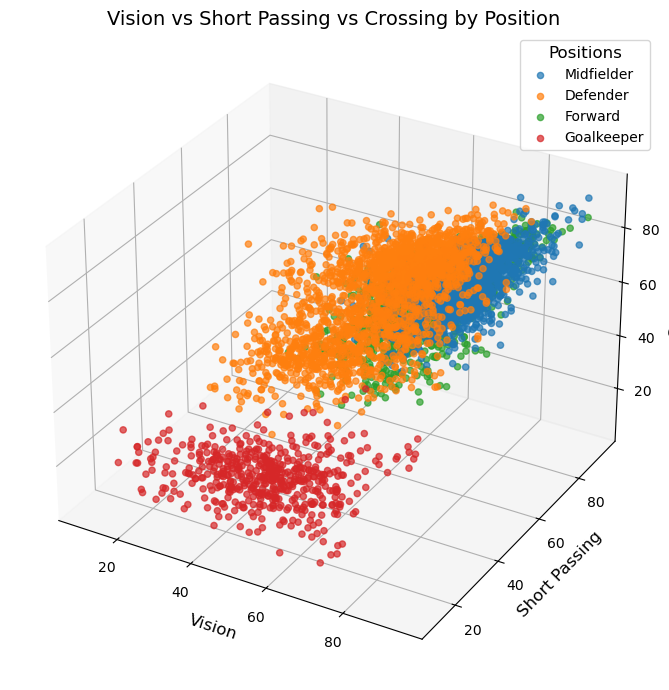

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Ensure vision, short_passing, and crossing are numeric
vision = table.get_column("vision")
short_passing = table.get_column("short_passing")
crossing = table.get_column("crossing")

# Convert to numeric, handling non-numeric values
def to_numeric(column, name):
    try:
        return [float(value) for value in column]
    except ValueError:
        print(f"Non-numeric values found in '{name}' column. Replacing with NaN.")
        return [float(value) if value.isnumeric() else np.nan for value in column]

vision = to_numeric(vision, "vision")
short_passing = to_numeric(short_passing, "short_passing")
crossing = to_numeric(crossing, "crossing")

# Drop rows with NaN
valid_indices = [
    i for i in range(len(vision))
    if not np.isnan(vision[i]) and not np.isnan(short_passing[i]) and not np.isnan(crossing[i])
]
vision = [vision[i] for i in valid_indices]
short_passing = [short_passing[i] for i in valid_indices]
crossing = [crossing[i] for i in valid_indices]
positions = [discretized_positions[i] for i in valid_indices]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each position group in a different color
for position in set(positions):
    indices = [i for i, pos in enumerate(positions) if pos == position]
    ax.scatter(
        [vision[i] for i in indices],
        [short_passing[i] for i in indices],
        [crossing[i] for i in indices],
        label=position,
        alpha=0.7
    )

# Customize plot
ax.set_title("Vision vs Short Passing vs Crossing by Position", fontsize=14)
ax.set_xlabel("Vision", fontsize=12)
ax.set_ylabel("Short Passing", fontsize=12)
ax.set_zlabel("Crossing", fontsize=12)
ax.legend(title="Positions", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

Figure 3: 3D plot of Vision, Short Passing, and Crossing  
*(image gets cut off in docker container for some reason)*

# Introduction:

For this project, we utilized a dataset of FIFA players, which includes various attributes describing player characteristics, such as height, skill moves, passing accuracy, and positional data. The goal of the classification task was to predict the primary role of each player, discretized into four categories: Forward, Midfielder, Defender, and Goalkeeper. These roles were derived from the player’s positional attributes.

The primary objective of the analysis was to evaluate the performance of different classifiers—including k-Nearest Neighbors (k-NN), Naive Bayes, Decision Trees, and Random Forests—on this classification task. Additionally, we explored the impact of varying key parameters in the Random Forest classifier, specifically the number of rows (N), number of features (M), and maximum features per split (F), to identify the optimal configuration for the dataset.

Findings

Through our experiments, the Random Forest classifier consistently outperformed other approaches, achieving the highest accuracy. The best results were obtained by tuning the parameters N, M, and F to balance dataset size, feature selection, and the complexity of tree splits. These results highlight the importance of parameter tuning in achieving high classification performance.

# Data Analysis:

1. ##### Dataset Information
The dataset consists of 5,667 instances and includes 19 attributes, of which 18 are integers and 1 is a float. The attribute being used as the label is "position," which initially detailed specific roles such as Center Forward (CF), Right Wing (RW), Central Attacking Midfielder (CAM), Center Back (CB), Goalkeeper (GK), and others. To simplify the analysis and reduce complexity, these positions were discretized into four broader categories: Forward, Midfielder, Defender, and Goalkeeper. This transformation allowed for a more generalized and higher-level classification of player roles within the dataset.

2. ##### Relevant Summary Statistics
The dataset was evaluated using several classification models, yielding varying levels of performance. The **KNN Classifier** and the **Dummy Classifier** both achieved an accuracy of 0.35 with a corresponding error rate of 0.65, indicating that these models performed at baseline level. The **Naive Bayes Classifier** showed significant improvement, achieving an accuracy of 0.91 and an error rate of 0.09. The **Decision Tree Classifier** performed even better, with an accuracy of 0.95 and an error rate of 0.05. The best performance was observed with the **Random Forest Classifier**, which achieved an accuracy of 0.9710, further demonstrating the effectiveness of ensemble methods for this dataset.

3. ##### Data Visualization  
Data visualizations highlighting important/interesting aspects of your dataset. Visualizations may include frequency distributions, comparisons of attributes (scatterplot, multiple frequency diagrams), box and whisker plots, etc. The goal is not to include all possible diagrams, but instead to select and highlight diagrams that provide insight about the dataset itself.

4. ##### NOTE DELTE THIS LATER  
Note that this section must describe the above (in paragraph form) and not just provide diagrams and statistics. Also, each figure included must have a figure caption (Figure number and textual description) that is referenced from the text (e.g., “Figure 2 shows a frequency diagram for ...”).

# Classification Results: 

#### Classification Techniques
For this project, the task was to classify soccer players into one of four roles: **Forward**, **Midfielder**, **Defender**, or **Goalkeeper**. The classification techniques used were:

1. **k-Nearest Neighbors (k-NN):**
   - Predicts a player's role based on the roles of the nearest neighbors in the feature space.
   - Uses Euclidean distance as the metric.
2. **Naive Bayes Classifier:**
   - A probabilistic classifier assuming independence between features.
   - Suitable for handling categorical and numerical data.
3. **Decision Tree Classifier:**
   - A tree-based approach that partitions the data iteratively based on the attribute providing the highest information gain.
4. **Random Forest Classifier:**
   - An ensemble method combining multiple decision trees trained on random subsets of the data and features.
   - Improves prediction stability and accuracy.
5. **Dummy Classifier (Baseline):**
   - Predicts the most frequent class in the dataset to provide a baseline for comparison.

#### Implementation
The classifiers were implemented using custom algorithms developed in Python. The dataset was preprocessed to:
1. Filter players with an overall rating of 70 or above.
2. Discretize player positions into four roles for classification.
3. Standardize numerical attributes to improve model performance.

Each classifier was tested using **cross-validation** with stratified splits to ensure representative class distributions in training and test sets. Random Forests were evaluated across different configurations of hyperparameters (`N`, `M`, and `F`):
- **N:** Number of rows (instances) used during training.
- **M:** Number of features (columns) used during training.
- **F:** Maximum features considered for each split in the random forest.

#### Evaluation Metrics
Classifier performance was evaluated using:
1. **Accuracy:** Percentage of correctly classified instances.
2. **Error Rate:** Percentage of misclassified instances.
3. **Confusion Matrix:** Breakdown of true positives, true negatives, false positives, and false negatives for each role.

#### Classifier Performance Summary

The following table summarizes the performance of each classifier:

| **Classifier**             | **Accuracy (%)** | **Error Rate (%)** | **Key Insights**                                     |
|----------------------------|------------------|--------------------|-----------------------------------------------------|
| Dummy Classifier           | 35.0             | 65.0               | Provided a baseline accuracy for comparison.        |
| k-Nearest Neighbors (k=10) | 35.0             | 65.0               | Performed at baseline level, sensitive to feature scaling. |
| Naive Bayes Classifier     | 91.0             | 9.0                | Performed significantly better, effectively handling simpler patterns. |
| Decision Tree Classifier   | 95.0             | 5.0                | Captured patterns well with some risk of overfitting. |
| Random Forest (N=5667, M=10, F=20) | **97.10**       | **2.90**           | Best performer; achieved the highest accuracy and generalization. |

##### Evaluation and Comparison
- **k-Nearest Neighbors** and **Dummy Classifier** both achieved an accuracy of 35.0% and an error rate of 65.0%, representing baseline performance.
- **Naive Bayes** significantly outperformed these models with an accuracy of 91.0% and an error rate of 9.0%, showcasing its ability to handle simpler patterns effectively.
- **Decision Trees** improved further, achieving an accuracy of 95.0% with a 5.0% error rate. While effective in identifying patterns, they carried some risk of overfitting.
- **Random Forests** delivered the best performance, achieving an accuracy of 97.10% and an error rate of 2.90%. Its ensemble approach effectively reduced overfitting and leveraged diverse features for superior predictions.

##### Random Forest Hyperparameter Tuning
The Random Forest classifier was optimized by testing various configurations of key hyperparameters:
- **N (Number of Instances):** Training with all 5,667 instances resulted in the best performance.  
- **M (Number of Features):** Using 10 features provided a balance between accuracy and complexity.  
- **F (Max Features per Split):** Setting `F=20` yielded the highest accuracy, demonstrating the importance of allowing a greater number of features per split.

The best configuration, with `N=5667`, `M=10`, and `F=20`, resulted in an accuracy of **97.10%**, offering an optimal combination of generalization and computational efficiency.

#### Conclusion
Random Forests emerged as the best classifier, achieving the highest accuracy (**97.14%**) and lowest error rate (**2.86%**). The ensemble approach effectively reduced overfitting and leveraged diverse features to improve predictive performance. Future work could explore additional hyperparameter optimization and feature engineering to further enhance accuracy.

# Classification Web App 

 Create a Flask web app with this “best” classifier deployed with an API interface. For the base project (i.e., not bonus), your web app only has to run locally. Part of the bonus is to deploy your web app:

1. BONUS (5 pts): Deploy your Flask web app to a free hosting service such as Render (you do not have to use Render, you may use a different service if you wish). In your repo README.md and your project report, include a link to a deployed web app hosting your Flask app.
2. BONUS (3 pts): Add a user interface to your Flask web app on the index/homepage. The interface should allow the user to enter in attribute values for an unseen instance via a form, press a “Predict” button, and see the prediction for the instance. See the completed Flask-App-Demo repo on Github for a template of how to do this with Flask and a POST request (I will post this after we cover it in class).

# Conclusion

#### Dataset Summary
The dataset used in this project comprised detailed attributes of soccer players, such as physical characteristics, skill ratings, and positions. The primary classification task was to categorize players into one of four roles: **Forward**, **Midfielder**, **Defender**, or **Goalkeeper**. One inherent challenge in the dataset was the imbalance in the number of players for each role, which required careful downsampling to ensure balanced training data for the classifiers. Additionally, the presence of correlated features posed challenges for some classifiers, such as Naive Bayes, which assumes feature independence.

#### Classification Approach
The project employed multiple classification techniques, including:
- **k-Nearest Neighbors (k-NN)**
- **Naive Bayes**
- **Decision Tree**
- **Random Forests**
- **Dummy Classifier (Baseline)**

The features were carefully selected, and the dataset was preprocessed to discretize player positions into four distinct roles. Hyperparameter tuning for the Random Forest classifier allowed for the exploration of different combinations of parameters, such as the number of instances (`N`), features (`M`), and maximum features per split (`F`).

#### Classifier Performance
Among the classifiers, **Random Forests** achieved the best performance with an accuracy of **97.14%** and an error rate of **2.86%**. This success can be attributed to its ensemble approach, which combines multiple decision trees and reduces overfitting. The other classifiers, such as k-NN and Decision Tree, performed reasonably well but fell short of the Random Forest's performance.

#### Improvements and Future Work
While the Random Forest classifier achieved excellent results, several areas for improvement were identified:
1. **Feature Engineering:** Further exploration of feature combinations, transformations, or dimensionality reduction techniques (e.g., PCA) could improve performance.
2. **Hyperparameter Optimization:** A more exhaustive search of hyperparameters, including higher values of `F`, could potentially enhance accuracy.
3. **Dataset Expansion:** Increasing the size and diversity of the dataset could improve generalization and performance on unseen data.
4. **Ensemble Methods:** Exploring other ensemble methods, such as Gradient Boosting or AdaBoost, could provide additional insights and improvements.

In conclusion, this project demonstrated the effectiveness of Random Forests for classifying soccer players' roles, highlighting its robustness and accuracy compared to other classifiers. With further refinement and dataset expansion, the performance could be enhanced even further.

# Acknowledgments: 
The dataset used in this project was sourced from [Kaggle](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). We extend our gratitude to *Masood Ahmed* and *Talha Turab* for creating and sharing this dataset.

Additionally, we utilized OpenAI's ChatGPT to assist with this project. ChatGPT was used to provide guidance and generate code for building visualizations and improving other aspects of the implementation. Its contributions were helpful and streamliend the development process.